In [8]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

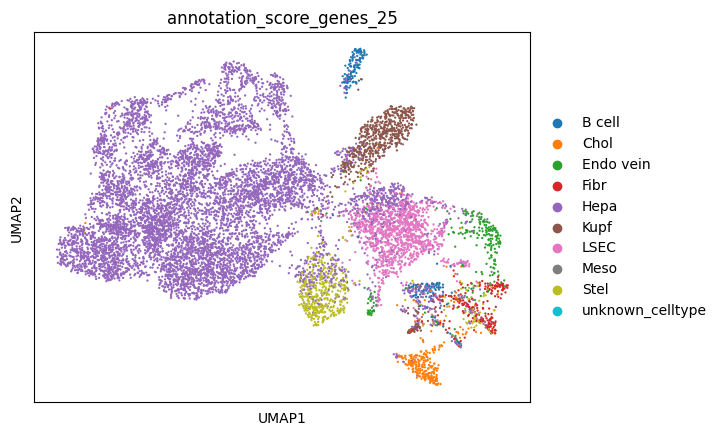

              atlas  annotation_score_genes_25
B cell     0.006215                   0.019505
Chol       0.026733                   0.025116
Hepa       0.579985                   0.701372
Kupf       0.032037                   0.058603
LSEC       0.092414                   0.107588
Meso       0.027965                   0.001158
Endo vein  0.031662                   0.020663
Fibr       0.030430                   0.020306
Stel       0.137683                   0.045511
Unknown    0.034876                   0.000178


In [4]:
# Do score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

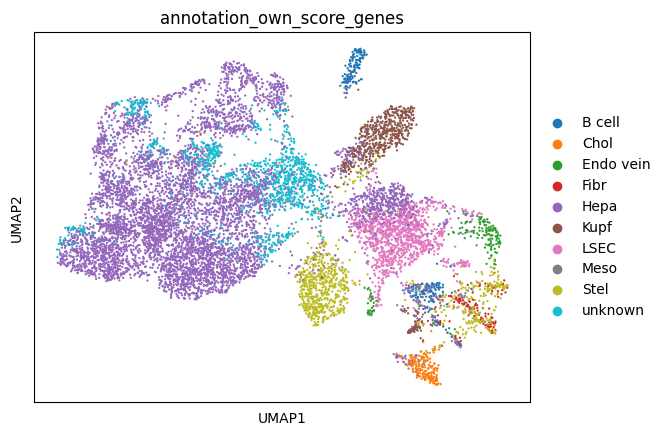

              atlas  annotation_own_score_genes
B cell     0.006215                    0.024136
Chol       0.026733                    0.018970
Hepa       0.579985                    0.575704
Kupf       0.032037                    0.057980
LSEC       0.092414                    0.100374
Meso       0.027965                    0.003384
Endo vein  0.031662                    0.015052
Fibr       0.030430                    0.010153
Stel       0.137683                    0.079444
Unknown    0.034876                    0.114802


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.536893,0.000000,0.018476,0.068247,0.020264,0.032274,0.015266,0.0,0.000000
1,0.132184,0.045767,0.000000,0.000000,0.361570,0.009912,0.242203,0.0,0.392005
2,0.128706,0.000000,0.000000,0.012307,0.020269,0.024728,0.358542,0.0,0.685175
3,0.197457,0.000000,0.000000,0.028096,0.000000,0.025705,0.178748,0.0,0.237066
4,0.232147,0.000000,0.000000,0.053522,0.000000,0.055269,0.016683,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.309270,0.000000,0.000000,0.045819,0.000000,0.060015,0.015148,0.0,0.000000
11224,0.506973,0.000000,0.000000,0.062634,0.048775,0.070629,0.021619,0.0,0.000000
11225,0.350109,0.000000,0.000000,0.045267,0.049173,0.017246,0.008158,0.0,0.000000
11226,0.034348,0.000000,0.000000,0.008226,0.059453,0.587182,0.184023,0.0,0.000000


In [5]:
# With norm_expr_var = True and norm_cell_type_score = MinMax
scores = own_score_genes(sdata,path_mg,norm_cell_type_score='MinMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

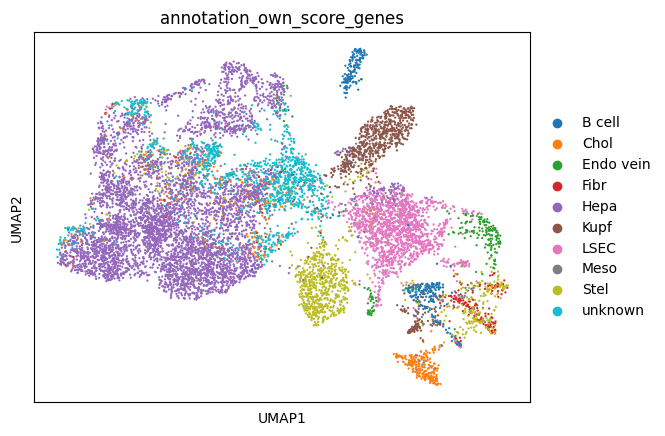

              atlas  annotation_own_score_genes
B cell     0.006215                    0.032152
Chol       0.026733                    0.044532
Hepa       0.579985                    0.468383
Kupf       0.032037                    0.071429
LSEC       0.092414                    0.136979
Meso       0.027965                    0.009530
Endo vein  0.031662                    0.020663
Fibr       0.030430                    0.015853
Stel       0.137683                    0.085679
Unknown    0.034876                    0.114802


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.320880,0.000000,0.000000,0.007757,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.333277,0.000000,0.210321,0.0,0.387969
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331554,0.0,0.683085
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144196,0.0,0.232001
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
11224,0.277005,0.000000,0.000000,0.001780,0.006621,0.000000,0.000000,0.0,0.000000
11225,0.046972,0.000000,0.000000,0.000000,0.007037,0.000000,0.000000,0.0,0.000000
11226,0.000000,0.000000,0.000000,0.000000,0.017773,0.540298,0.149693,0.0,0.000000


In [9]:
# With norm_expr_var = True and norm_cell_type_score = ZeroMax
scores = own_score_genes(sdata,path_mg,norm_cell_type_score='ZeroMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

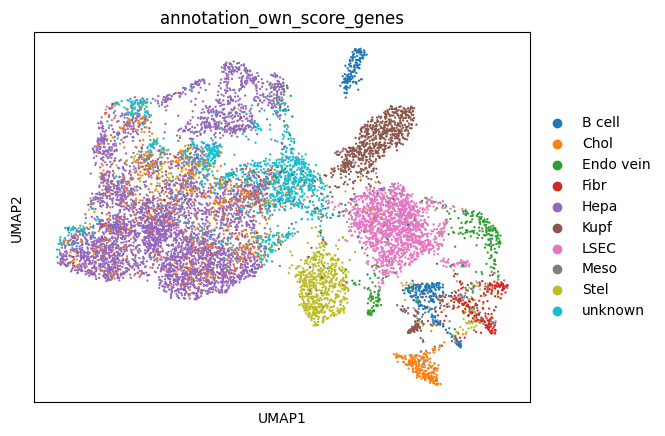

              atlas  annotation_own_score_genes
B cell     0.006215                    0.036694
Chol       0.026733                    0.097346
Hepa       0.579985                    0.396063
Kupf       0.032037                    0.074368
LSEC       0.092414                    0.135198
Meso       0.027965                    0.021019
Endo vein  0.031662                    0.029658
Fibr       0.030430                    0.024670
Stel       0.137683                    0.070182
Unknown    0.034876                    0.114802


In [10]:
# With norm_expr_var = True and norm_cell_type_score = Nmarkers
own_score_genes(sdata,path_mg,norm_cell_type_score='Nmarkers')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)